### Hw_09

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

In [168]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [169]:
# Завантаження та попередня обробка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [170]:
batch_size = 64
epochs = 20

In [171]:
# Створення архітектури мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [172]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 [==============================] - 11s 11ms/step - loss: 0.5080 - accuracy: 0.8181 - val_loss: 0.4246 - val_accuracy: 0.8445
Epoch 2/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3695 - accuracy: 0.8652 - val_loss: 0.4258 - val_accuracy: 0.8410
Epoch 3/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3321 - accuracy: 0.8780 - val_loss: 0.3577 - val_accuracy: 0.8698
Epoch 4/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3101 - accuracy: 0.8863 - val_loss: 0.3830 - val_accuracy: 0.8650
Epoch 5/20
938/938 [==============================] - 11s 12ms/step - loss: 0.2893 - accuracy: 0.8921 - val_loss: 0.3499 - val_accuracy: 0.8730
Epoch 6/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2770 - accuracy: 0.8964 - val_loss: 0.3405 - val_accuracy: 0.8755
Epoch 7/20
938/938 [==============================] - 9s 9ms/step - loss: 0.2613 - accuracy: 0.9022 - val_loss: 0.3407 - val_accuracy: 0.

In [174]:
# Виведення результатів та графіків
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 1s - loss: 0.3591 - accuracy: 0.8975 - 697ms/epoch - 2ms/step

Точність на тестових даних: 0.8974999785423279


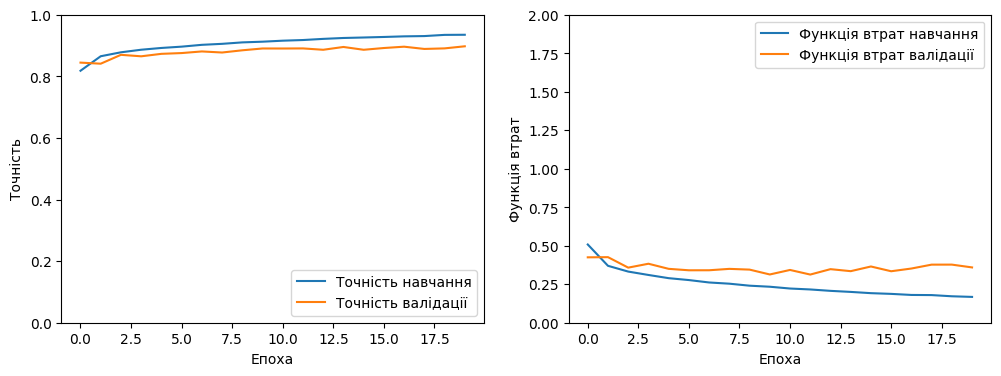

In [175]:
# Графіки навчання
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність навчання')
plt.plot(history.history['val_accuracy'], label = 'Точність валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Функція втрат навчання')
plt.plot(history.history['val_loss'], label = 'Функція втрат валідації')
plt.xlabel('Епоха')
plt.ylabel('Функція втрат')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()

1/1 [==============================] - 0s 102ms/step


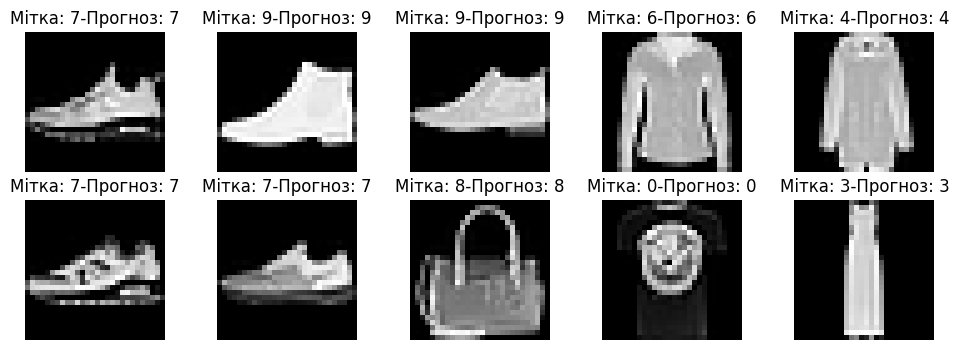

In [176]:
# Випадкові прогнози для перших 10 зображень
random_indices = np.random.randint(0, len(test_images), size=10)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]
predictions = model.predict(random_images)

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f'Мітка: {random_labels[i]}-Прогноз: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()



## Можна зробити наступний висновок:

Нейронна мережа, яка створена з допомогою Keras, показала досить хорошу точність.

В кінці 20 епох навчання точність на навчальних даних (train accuracy) складає близько 93.49%.

Точність на валідаційних даних (val_accuracy) досягла близько 89.75% на останній епохі.

Це означає, що модель добре класифікує зображення з датасету fashion_mnist в один з 10 можливих класів (наприклад, футболка, шорти, сукня тощо).

Важливо також враховувати, що модель навчилася менше ніж за 1 хвилину, що є досить ефективним часом для досягнення такої точності. Це показує важливість оптимізації швидкості навчання та розміру мережі для досягнення балансу між точністю та часом навчання.